In [1]:
# Importing Library
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Data Preparation

In [2]:
data = pd.read_csv("train.csv")
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [3]:
data.shape

(1000, 12)

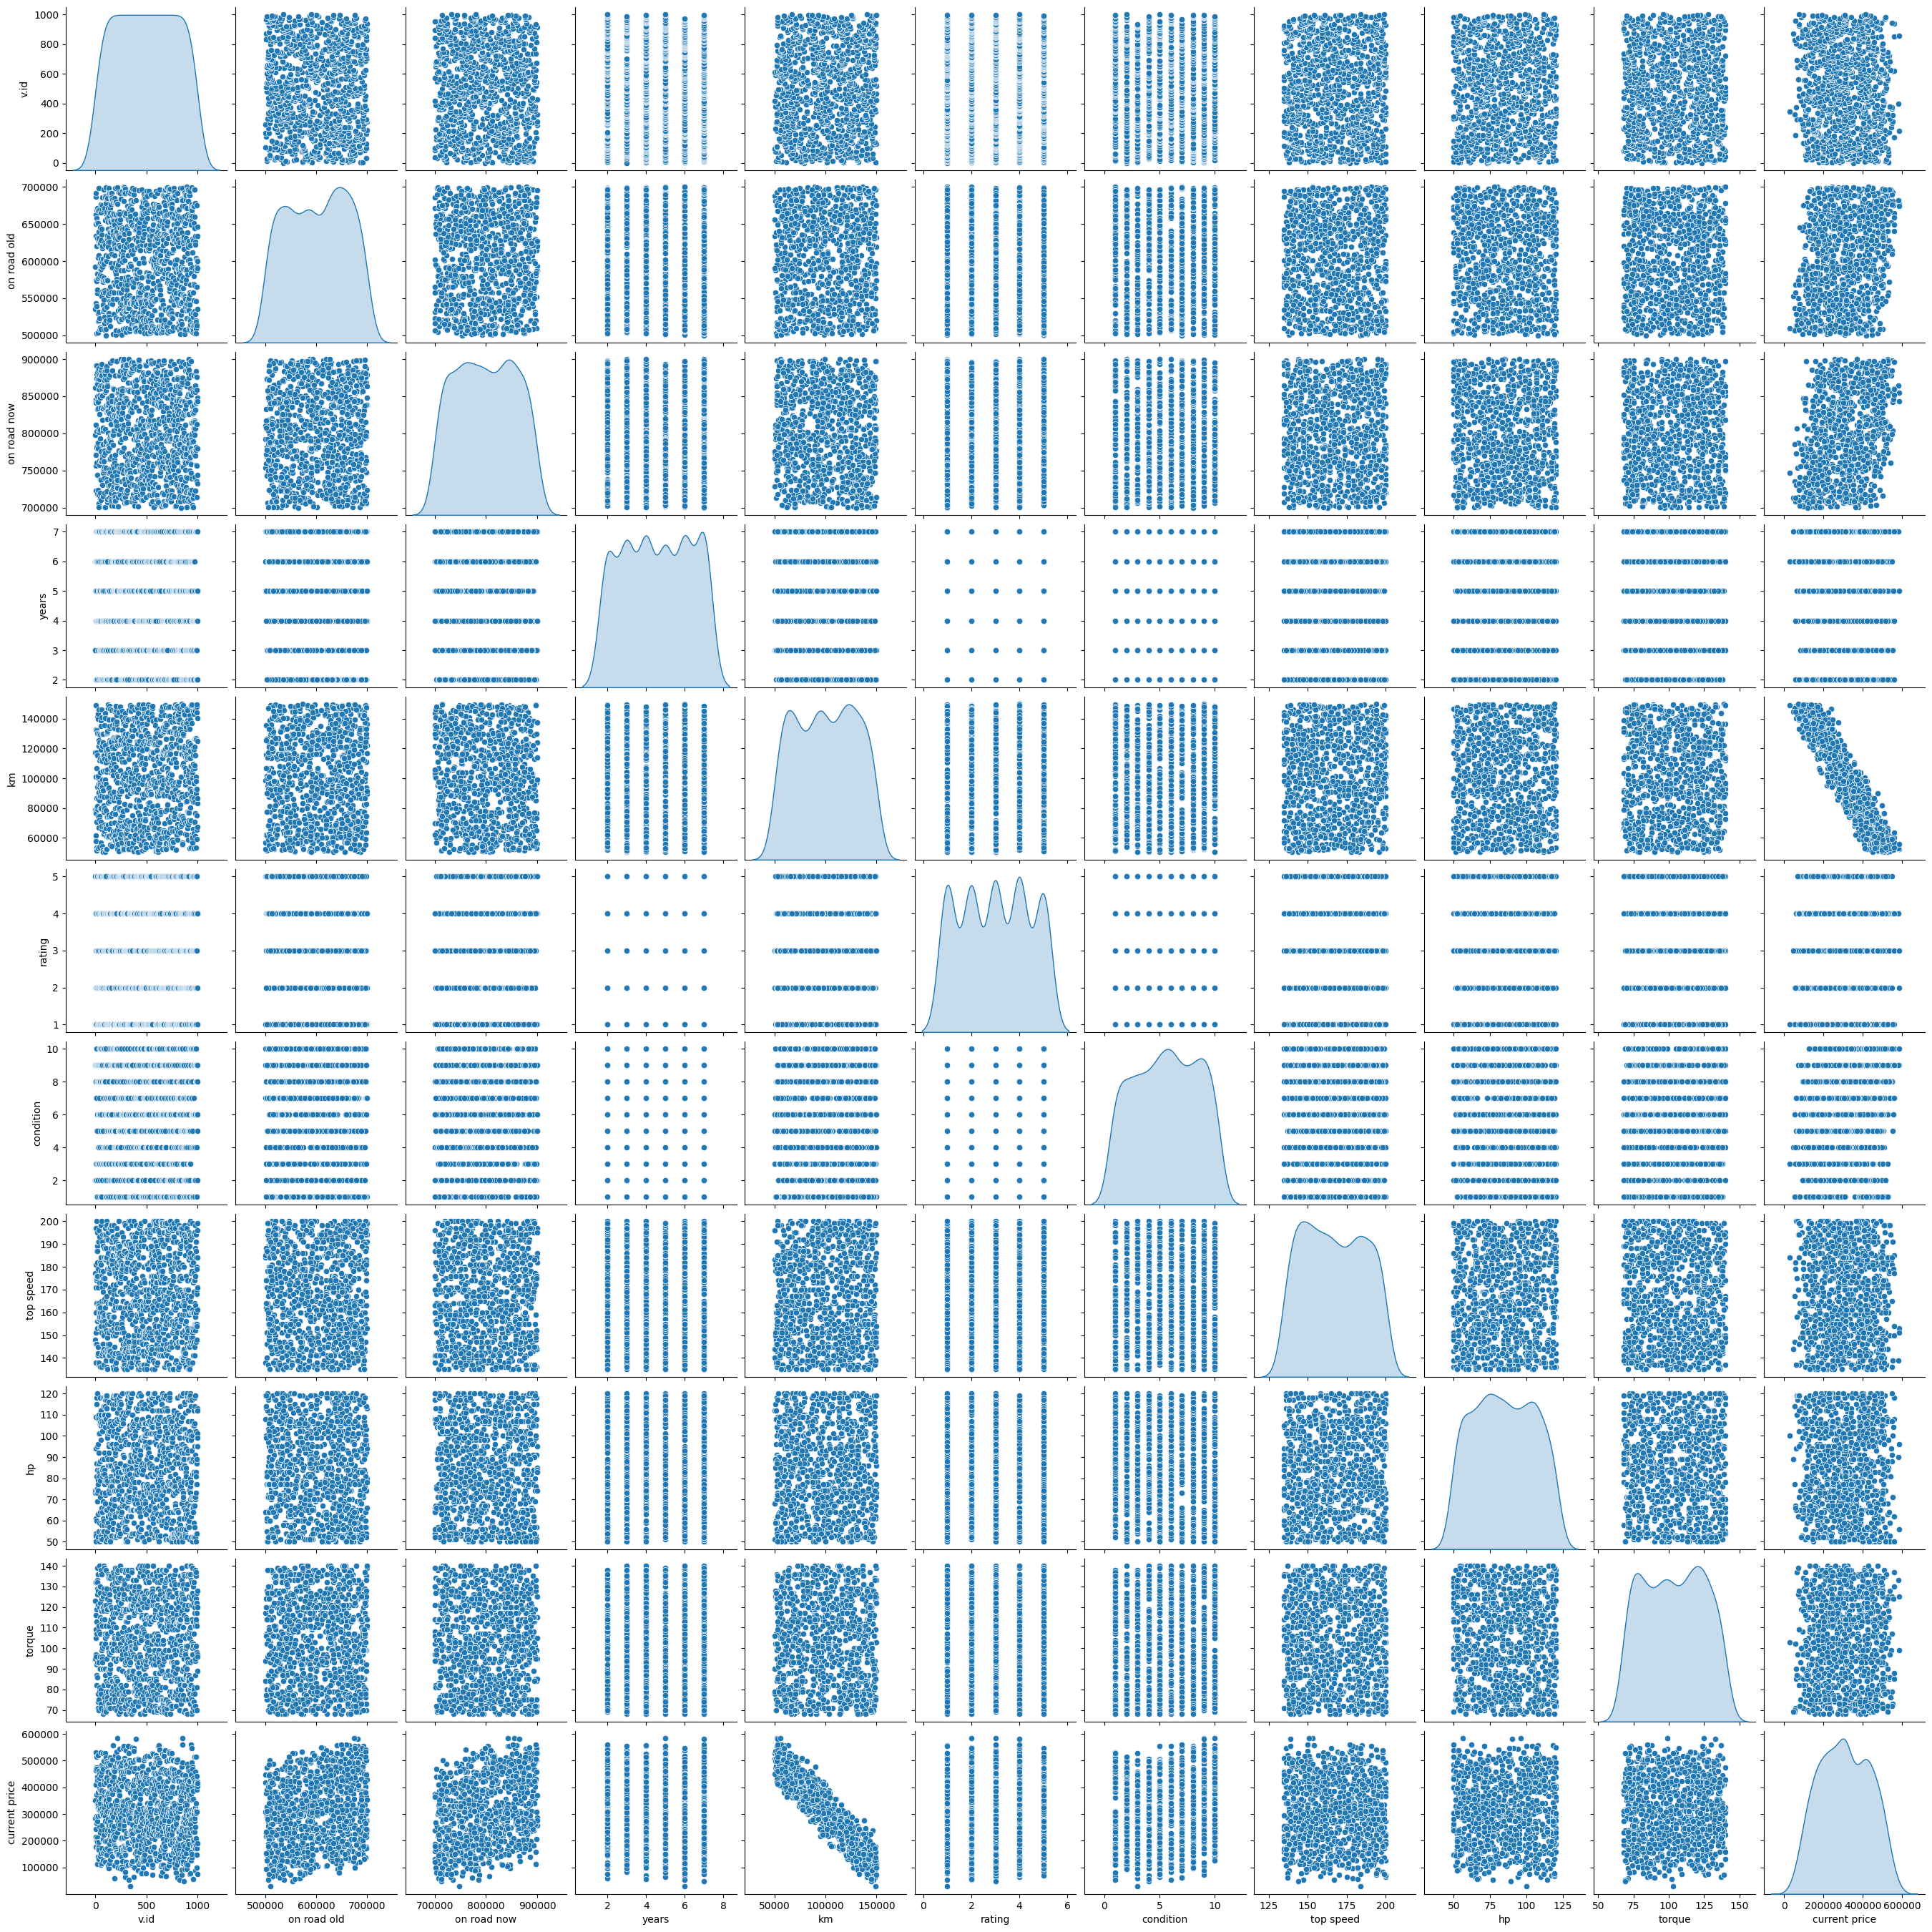

In [4]:
#Visualizes relationships between selected features using pairwise scatter plots and kernel density plots for distributions.
sns.pairplot(data[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'top speed', 'hp', 'torque', 'current price']],diag_kind = 'kde')

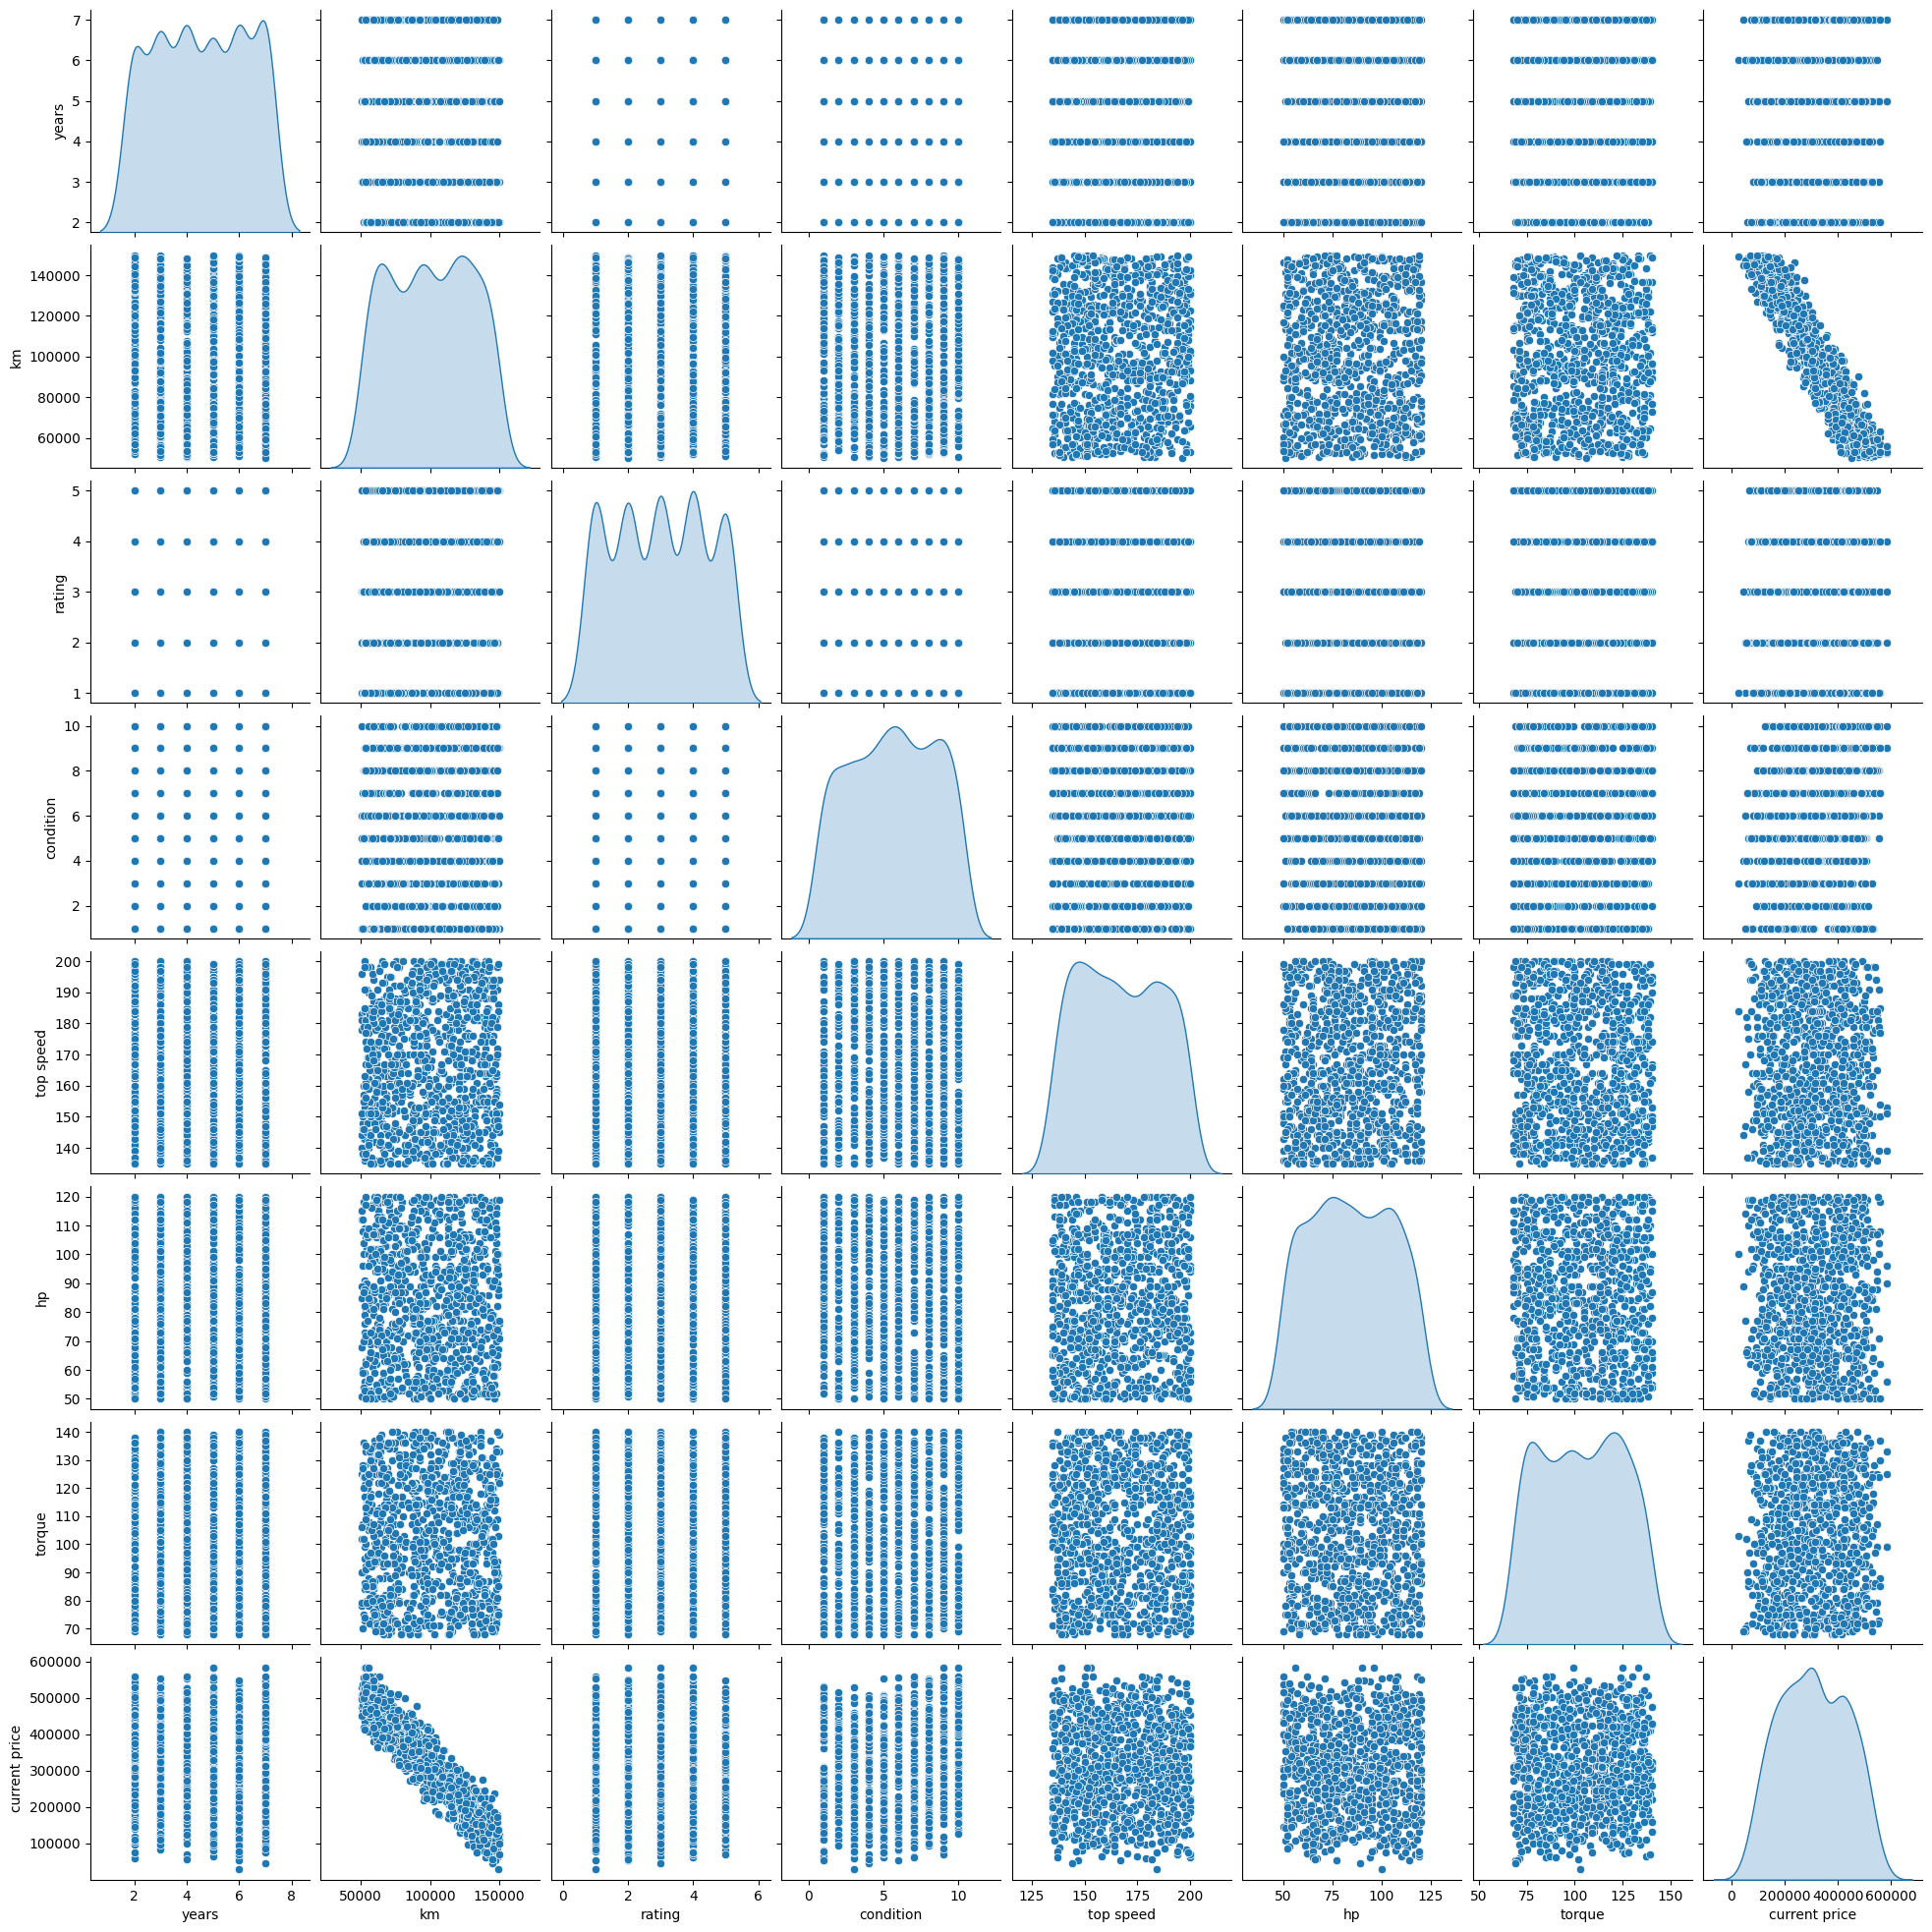

In [5]:
# Removes v.id, on road old, on road now as they may be unnecessary, then visualizes reduced features.
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'top speed', 'hp', 'torque', 'current price']],diag_kind = 'kde')

In [6]:
# Converts DataFrame to a TensorFlow tensor and casts it to float32 for model compatibility.
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [7]:
# Preview data before and after shuffling to ensure randomness.
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [8]:
# Shuffle the data in random
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[6.170000e+02 6.716300e+05 7.073610e+05 2.000000e+00 7.024600e+04
  4.000000e+00 2.000000e+00 1.300000e+01 1.870000e+02 1.180000e+02
  1.040000e+02 4.093125e+05]
 [3.050000e+02 5.363310e+05 7.473860e+05 2.000000e+00 1.039830e+05
  3.000000e+00 5.000000e+00 1.300000e+01 1.590000e+02 7.200000e+01
  1.020000e+02 2.278455e+05]
 [7.080000e+02 5.040160e+05 7.919330e+05 4.000000e+00 1.066530e+05
  4.000000e+00 2.000000e+00 1.500000e+01 1.940000e+02 1.120000e+02
  9.600000e+01 2.216920e+05]
 [9.320000e+02 5.678220e+05 7.101590e+05 6.000000e+00 1.395910e+05
  3.000000e+00 3.000000e+00 1.400000e+01 1.940000e+02 1.190000e+02
  8.200000e+01 7.727700e+04]
 [4.270000e+02 6.440520e+05 7.962320e+05 2.000000e+00 8.169500e+04
  2.000000e+00 5.000000e+00 1.300000e+01 1.500000e+02 7.800000e+01
  1.300000e+02 3.951880e+05]], shape=(5, 12), dtype=float32)


In [9]:
# Input variable (features),Splits the features (X) and label (y) tensors.
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[2.00000e+00 7.02460e+04 4.00000e+00 2.00000e+00 1.30000e+01 1.87000e+02
  1.18000e+02 1.04000e+02]
 [2.00000e+00 1.03983e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.59000e+02
  7.20000e+01 1.02000e+02]
 [4.00000e+00 1.06653e+05 4.00000e+00 2.00000e+00 1.50000e+01 1.94000e+02
  1.12000e+02 9.60000e+01]
 [6.00000e+00 1.39591e+05 3.00000e+00 3.00000e+00 1.40000e+01 1.94000e+02
  1.19000e+02 8.20000e+01]
 [2.00000e+00 8.16950e+04 2.00000e+00 5.00000e+00 1.30000e+01 1.50000e+02
  7.80000e+01 1.30000e+02]], shape=(5, 8), dtype=float32)


In [10]:
# output variable 
y = tensor_data[:,-1]
print(y[:5])
#the shape is (5,) wich is 1D

tf.Tensor([409312.5 227845.5 221692.   77277.  395188. ], shape=(5,), dtype=float32)


In [11]:
# the output of y variable in 1d dimension we need to expand it to 2d to mactch the input variable
y = tf.expand_dims(y, axis = -1)
print(y[:5])

tf.Tensor(
[[409312.5]
 [227845.5]
 [221692. ]
 [ 77277. ]
 [395188. ]], shape=(5, 1), dtype=float32)


# Normalization 

Normalization in databases and machine learning serves to organize and structure data to minimize redundancy, enhance data integrity, and improve performance. In databases, it reduces data duplication and simplifies updates. In machine learning, it scales data to a similar range, preventing features with larger values from dominating algorithms

Normalization is a type of feature scaling that brings all numerical features to a similar range, preventing features with larger values from disproportionately influencing algorithms. 

In [12]:
# Example of normalization for custom inputs ,mean ,variance

normalizer = Normalization(axis = -1, mean = 4 ,variance = 5)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

#it reduces the scale by using this where x=input x-mean/sqrt(variance)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-0.4472136,  0.       ,  0.4472136,  0.8944272,  1.3416407],
       [ 0.       ,  0.4472136,  0.8944272,  1.3416407,  1.7888544]],
      dtype=float32)>

In [13]:
# using adapt example
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer.adapt(x_normalized) #adapt :Computes the mean and variance of values in a dataset.
normalizer(x_normalized)

#(x-mean)/standard deviation
# (3-3.5)/0.5 = -1

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [14]:
print(X.shape)

(1000, 8)


In [15]:
# Splits dataset: 80% training, 10% validation, 10% test.
Train_Ratio = 0.8
Val_Ratio = 0.1
Test_Ratio = 0.1
Dataset_Size = len(X)

In [16]:
# Training Set
X_train = X[:int(Dataset_Size*Train_Ratio)]
y_train = y[:int(Dataset_Size*Train_Ratio)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [17]:
# Validating set
X_val = X[int(Dataset_Size*Train_Ratio):int(Dataset_Size*(Train_Ratio + Val_Ratio))]
y_val = y[int(Dataset_Size*Train_Ratio):int(Dataset_Size*(Train_Ratio + Val_Ratio))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [18]:
# Testing Set
X_test = X[int(Dataset_Size*(Train_Ratio + Val_Ratio)):]
y_test = y[int(Dataset_Size*(Train_Ratio + Val_Ratio)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [19]:
#For Training Dataset Converts data into TensorFlow tf.data.Dataset for efficient training with batching and prefetching.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, 
                                      reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
for x,y in train_dataset:
    print(x,y)
    break

tf.Tensor(
[[6.00000e+00 1.27668e+05 2.00000e+00 6.00000e+00 1.40000e+01 1.88000e+02
  1.07000e+02 1.32000e+02]
 [4.00000e+00 1.06653e+05 4.00000e+00 2.00000e+00 1.50000e+01 1.94000e+02
  1.12000e+02 9.60000e+01]
 [2.00000e+00 8.16950e+04 2.00000e+00 5.00000e+00 1.30000e+01 1.50000e+02
  7.80000e+01 1.30000e+02]
 [2.00000e+00 1.03983e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.59000e+02
  7.20000e+01 1.02000e+02]
 [7.00000e+00 6.76960e+04 4.00000e+00 7.00000e+00 9.00000e+00 1.75000e+02
  8.30000e+01 8.20000e+01]
 [7.00000e+00 1.06846e+05 4.00000e+00 6.00000e+00 1.10000e+01 1.45000e+02
  7.50000e+01 1.28000e+02]
 [3.00000e+00 7.63630e+04 4.00000e+00 8.00000e+00 8.00000e+00 1.52000e+02
  1.15000e+02 8.40000e+01]
 [7.00000e+00 1.01416e+05 3.00000e+00 8.00000e+00 9.00000e+00 1.71000e+02
  7.70000e+01 1.28000e+02]
 [4.00000e+00 6.66180e+04 2.00000e+00 9.00000e+00 9.00000e+00 1.72000e+02
  6.30000e+01 1.14000e+02]
 [2.00000e+00 7.85350e+04 3.00000e+00 4.00000e+00 8.00000e+00 1.85000e+02
  7.30

In [21]:
# For Validating Dataset Converts data into TensorFlow tf.data.Dataset for efficient training with batching and prefetching.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, 
                                      reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [22]:
#for testing Dataset Converts data into TensorFlow tf.data.Dataset for efficient training with batching and prefetching.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, 
                                      reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [23]:
# Fits the normalizer to training data and previews it.
normalizer = Normalization()
normalizer.adapt(X_train) #adapt :Computes the mean and variance of values in a dataset.
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.513249  , -1.0216076 ,  0.73058003, -1.2774569 ,  0.6107241 ,
         1.0819299 ,  1.6702379 ,  0.02850991],
       [-1.513249  ,  0.1416898 ,  0.0125652 , -0.20957232,  0.6107241 ,
        -0.39214253, -0.5798173 , -0.06672195],
       [-0.34471703,  0.23375502,  0.73058003, -1.2774569 ,  1.5047392 ,
         1.450448  ,  1.3767524 , -0.35241753],
       [ 0.823815  ,  1.3695018 ,  0.0125652 , -0.9214954 ,  1.0577316 ,
         1.450448  ,  1.7191521 , -1.0190406 ],
       [-1.513249  , -0.6268306 , -0.7054496 , -0.20957232,  0.6107241 ,
        -0.86595154, -0.28633186,  1.2665241 ]], dtype=float32)>

In [24]:
print(X_train[:5])

tf.Tensor(
[[2.00000e+00 7.02460e+04 4.00000e+00 2.00000e+00 1.30000e+01 1.87000e+02
  1.18000e+02 1.04000e+02]
 [2.00000e+00 1.03983e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.59000e+02
  7.20000e+01 1.02000e+02]
 [4.00000e+00 1.06653e+05 4.00000e+00 2.00000e+00 1.50000e+01 1.94000e+02
  1.12000e+02 9.60000e+01]
 [6.00000e+00 1.39591e+05 3.00000e+00 3.00000e+00 1.40000e+01 1.94000e+02
  1.19000e+02 8.20000e+01]
 [2.00000e+00 8.16950e+04 2.00000e+00 5.00000e+00 1.30000e+01 1.50000e+02
  7.80000e+01 1.30000e+02]], shape=(5, 8), dtype=float32)


# Model Building Sequential Api

In [25]:
#Builds a regression model using the Sequential API with 3 hidden layers and 1 output node.
model = tf.keras.Sequential([
                            InputLayer(input_shape = (8,)), 
                            normalizer,
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(1),# dense is output layer that is y(pred)
])
model.summary()

C:\Users\sande\Project\Pro-Env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [26]:
# A commented alternative for model creation.
# model = tf.keras.Sequential()
# model.add(normalizer)
# model.add(Dense(1))
# model.summary()

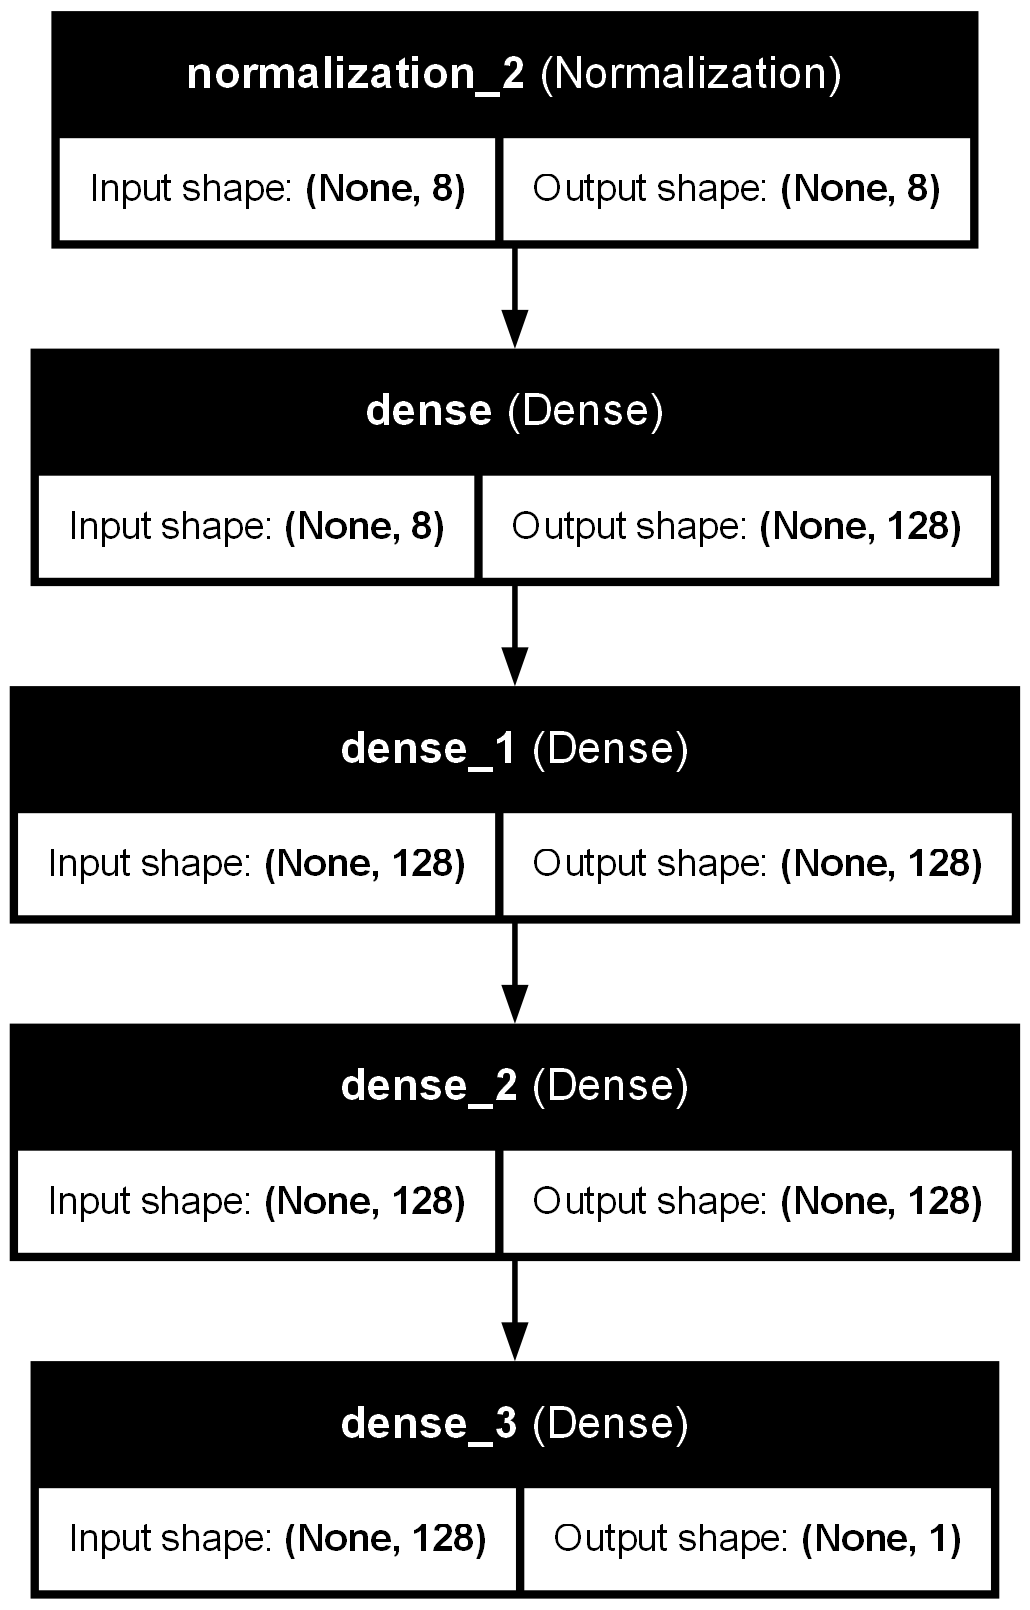

In [27]:
# Plots model architecture and saves as an image.
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
# Compiles model with MAE loss and RMSE metric
model.compile(optimizer = Adam(learning_rate = 0.1), 
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [29]:
history = model.fit(train_dataset, 
                    validation_data= val_dataset, 
                    epochs = 100, # Trains the model for 100 epochs.
                    verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 226752.3125 - root_mean_squared_error: 266715.3438 - val_loss: 39417.8789 - val_root_mean_squared_error: 50521.9258
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46184.1133 - root_mean_squared_error: 56588.2148 - val_loss: 44691.7266 - val_root_mean_squared_error: 55714.8594
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44095.2930 - root_mean_squared_error: 53731.6797 - val_loss: 44819.0898 - val_root_mean_squared_error: 56156.1680
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44527.3359 - root_mean_squared_error: 57728.3281 - val_loss: 53185.8516 - val_root_mean_squared_error: 67585.2578
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51548.7344 - root_mean_squared_error: 65036.2109 - val_loss: 46091.8945 - val_root_mean_squared_error: 56420.0352
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46638.9062 - root_mean_squared_error: 60023.2969 - val_loss: 35104.1797 - 

In [30]:
history.history

{'loss': [143761.0,
  45526.140625,
  43936.26171875,
  45061.71484375,
  47771.0234375,
  45544.953125,
  43582.34375,
  42344.03125,
  47081.51171875,
  41310.28515625,
  46527.30078125,
  43270.1796875,
  42961.58984375,
  48593.03125,
  56388.4140625,
  48358.6484375,
  39390.375,
  37609.90625,
  42021.10546875,
  42221.890625,
  41359.77734375,
  39955.171875,
  38079.8984375,
  39455.81640625,
  39073.55078125,
  41650.96875,
  40289.09765625,
  38597.0234375,
  40718.484375,
  38245.76953125,
  40245.546875,
  38539.34375,
  36874.46875,
  37535.71875,
  37379.0390625,
  37989.84375,
  38263.70703125,
  36173.9375,
  36554.0,
  35819.6328125,
  36510.515625,
  38352.5859375,
  35312.375,
  35602.73828125,
  34871.6953125,
  35777.4375,
  36838.36328125,
  35756.1796875,
  36320.81640625,
  34963.37890625,
  36325.80078125,
  34710.99609375,
  34881.15625,
  36575.12109375,
  37858.84765625,
  34826.109375,
  35493.12109375,
  36940.73828125,
  36354.234375,
  34384.44921875,
  

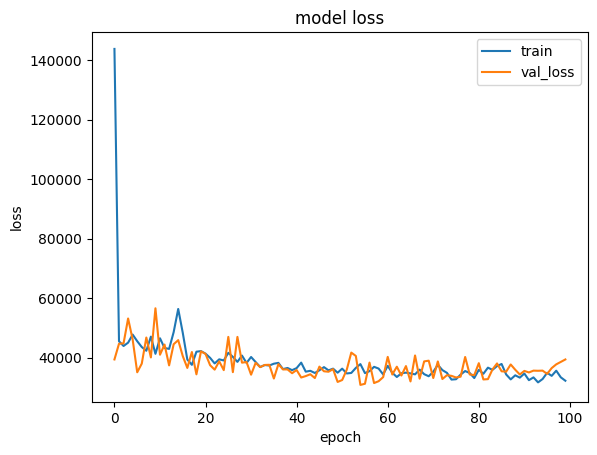

In [31]:
# Visualizes loss and val_loss for training vs validation over epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

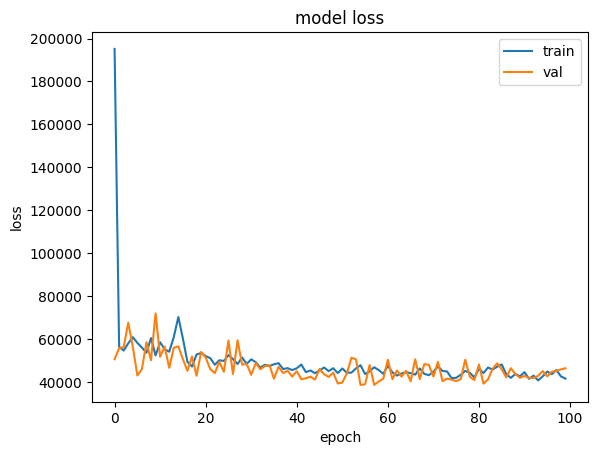

In [32]:
# Visualizes loss and RMSE for training vs validation over epochs.
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [33]:
# Evaluates model performance on validation.
model.evaluate(X_val,y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39742.9570 - root_mean_squared_error: 46910.3164 


[39411.5546875, 46323.4609375]

In [34]:
# Evaluates model performance on test sets.
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44987.3594 - root_mean_squared_error: 55748.1641 


[43685.83984375, 53837.4921875]

In [35]:
X_test.shape

TensorShape([100, 8])

In [36]:
model.predict(tf.expand_dims(X_test[0],axis = 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[149182.61]], dtype=float32)

In [37]:
print(X_test[0].shape)
print(X_test.shape)

(8,)
(100, 8)


In [38]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([145898.5], dtype=float32)>

In [39]:
# Predicts test results and prepares true/predicted labels for visualization.
y_true = list(y_test[:,0].numpy())  #actual Value
y_pred = list(model.predict(X_test)[:,0])   #predicted Values
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[np.float32(149182.6), np.float32(354235.6), np.float32(147815.97), np.float32(402340.4), np.float32(307186.72), np.float32(337570.84), np.float32(419327.22), np.float32(249210.69), np.float32(171196.16), np.float32(482339.6), np.float32(293285.78), np.float32(242035.56), np.float32(111803.11), np.float32(438666.66), np.float32(444046.66), np.float32(400313.84), np.float32(85804.4), np.float32(333571.7), np.float32(479945.9), np.float32(134247.22), np.float32(312615.72), np.float32(316897.72), np.float32(410629.53), np.float32(248997.06), np.float32(458743.97), np.float32(203406.72), np.float32(123834.14), np.float32(257181.44), np.float32(195668.53), np.float32(255761.34), np.float32(255675.33), np.float32(323228.6), np.float32(587743.06), np.float32(94325.21), np.float32(493606.8), np.float32(372650.1), np.float32(209308.75), np.float32(296367.12), np.float32(405008.47), np.float32(242413.38), np.float32(394802.47), np.float32(216118.84), np.floa

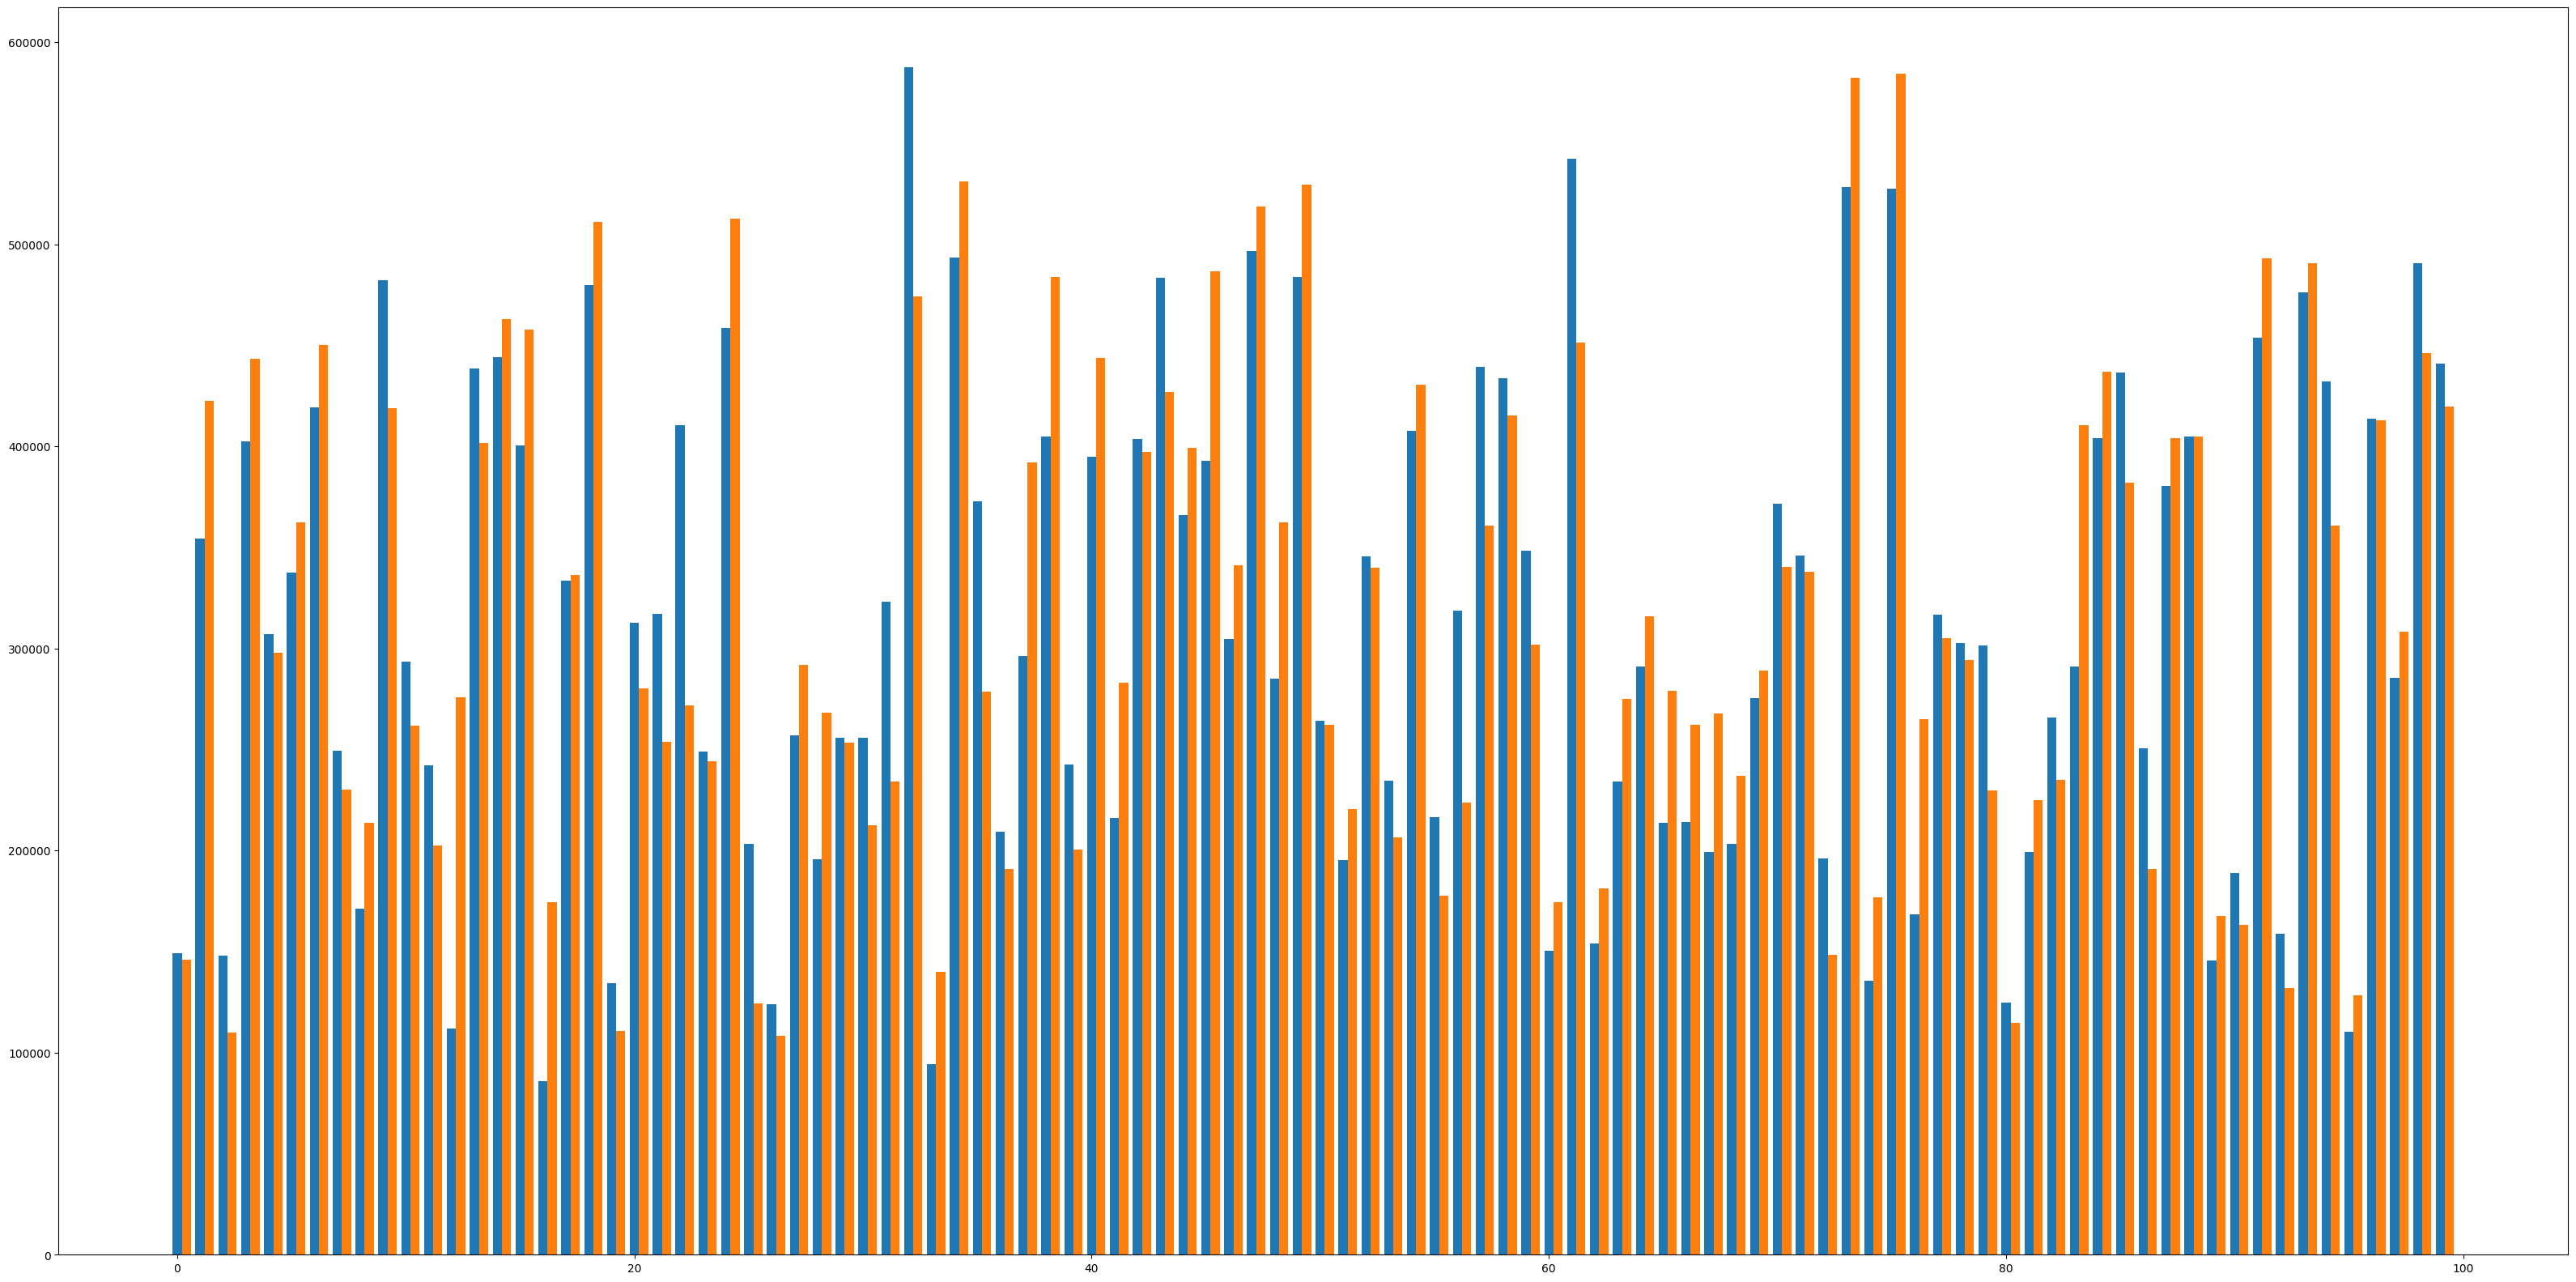

In [40]:
# Plots a side-by-side comparison of predicted vs actual prices for 100 cars
ind = np.arange(100)
plt.figure(figsize =(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label = 'Pridicted Car Price')
plt.bar(ind + width, y_true, width, label = 'Actual Car Price')

plt.show()